In [2]:
import numpy as np # linear algebra
import re, os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

In [3]:
import tensorflow as tf
# BERT
import tensorflow_hub as hub

In [4]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(355.0307, shape=(), dtype=float32)


In [5]:
import tensorflow_text
preprocess_url= hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoded_url = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [5]:
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'}

In [4]:
train_csv = pd.read_csv('datasets/train.csv',names=['class', 'title', 'content', 'answer'])

In [5]:
train_csv['class']=train_csv['class'].map(categories)

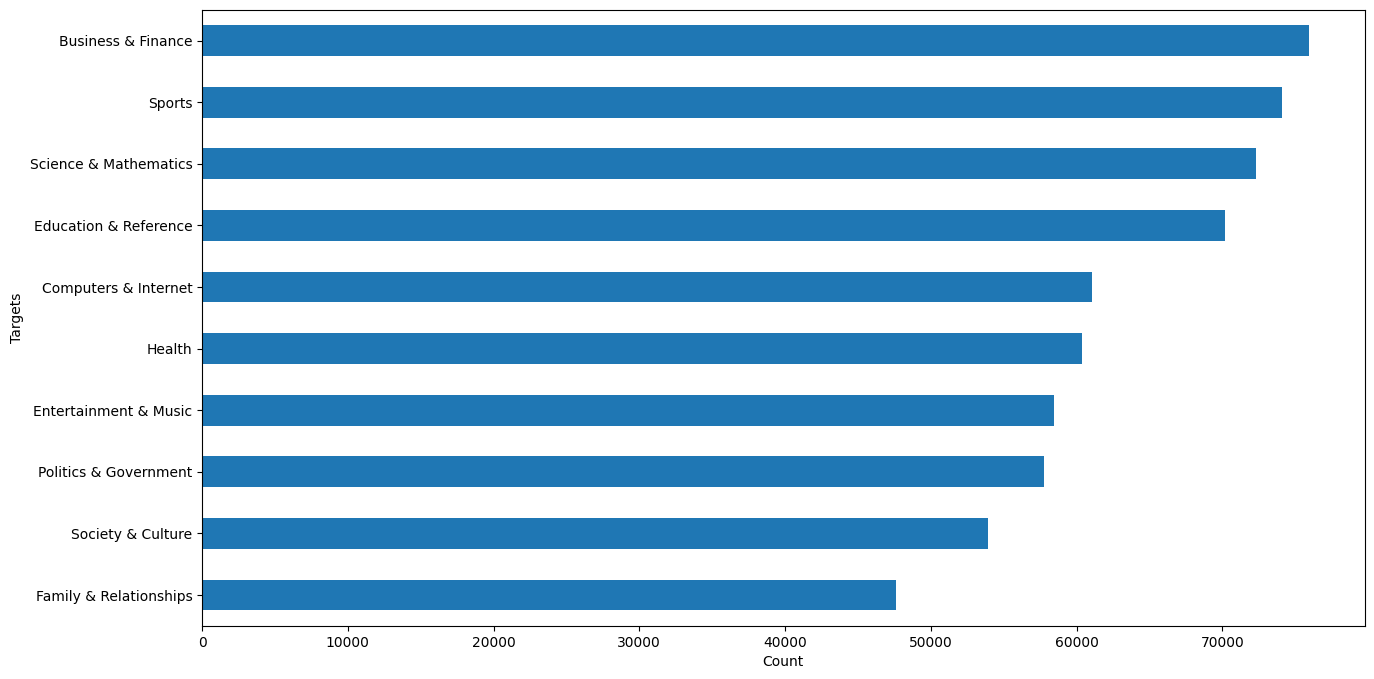

In [6]:
fig = plt.figure(figsize=(15, 8))
data_isnull = train_csv[train_csv['content'].isnull()]
index = pd.Index(data_isnull['class'])
index.value_counts().sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Targets') 
plt.xlabel('Count')
plt.show();

In [8]:
# train_csv['length'] = train_csv.loc[:, 'content'].astype(str).apply(len)
data_is_not_null = train_csv[train_csv['content'].notnull()]
data_is_not_null.shape
data_is_not_null.to_csv('datasets/train_not_null_data.csv', index=False)

In [9]:
data_is_not_null

,class,title,content,answer
0,Computers & Internet,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,Sports,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,Health,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,Business & Finance,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,Business & Finance,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...
...,...,...,...,...
1399991,Society & Culture,Why believe in such hopelessness?,"Why believe in a religion, or lack there of, t...","Right on!! I live a sheltered life, honestly...."
1399992,Education & Reference,where can i get a horse's skeletal and muscula...,mainly for a Breyer horse:Anatomy in Motion,Here's everything you can possibly wanna know....
1399993,Politics & Government,In a quest to promote racial equality does the...,"For example, by allowing jobs to advertise for...",Yes. It also promotes gang culture in minorit...
1399996,Business & Finance,Ways to sell your video games?,Like if you want to sell your video games how ...,"ebay, electronic boutique, babbages or flea ma..."


In [6]:
a = ['a','a','a','a','a','a']
" ".join(a)

'a a a a a a'

In [3]:
stop_words = set(stopwords.words('english'))
from tqdm import tqdm
def process(text) : 
    word_tokens = word_tokenize(str(text))
    filtered_sentence = [ w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

    
def cleanAndSave(source, dest) : 
    #@ Load data
    df = pd.read_csv(source, names=['class', 'title', 'content', 'answer'])
    X1, X2, X3, Y = df['title'], df['content'], df['answer'], df['class']

    #@ Empty lists to append everything to one column
    title, question, answer, clss = [], [], [], []
    
    #@ Process text
    for i in tqdm(range(0, len(X1))) :
        title.append(process(X1[i]))
        question.append(process(X2[i]))
        answer.append(process(X3[i]))
        clss.append(Y[i])
    #@ Merge processed text columns into dataframe and save
    df = pd.DataFrame({"title" : title, "question" : question, "answer" : answer, "class" : clss})
    df['text'] = df['title'].map(str) + ' ' + df['question'].map(str) + ' ' + df['answer'].map(str)

    df_save = pd.DataFrame({'text': df['text'], "class" : df['class']})
    df_save.drop(labels=0,axis=0)
    df_save.to_csv(dest, index=False)
# cleanAndSave('datasets/train_not_null_data.csv', 'datasets/cleaned_trained_data.csv')
print('done')

done


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jerry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
clean_train = pd.read_csv('datasets/cleaned_trained_data.csv')

In [16]:
cleaned_data = clean_train
cleaned_data = cleaned_data.drop(cleaned_data.index[0])
cleaned_data.head(10)

,text,class
1,n't optical mouse work glass table ? even surf...,Computers & Internet
2,best off-road motorcycle trail ? long-distance...,Sports
3,Trans Fat ? reduce ? heard tras fat bad body ....,Health
4,many planes Fedex ? heard largest airline worl...,Business & Finance
5,"san francisco bay area , make sense rent buy ?...",Business & Finance
6,'s best way clean keyboard ? small stuff stuck...,Computers & Internet
7,people blush embarrassed ? people blush embarr...,Science & Mathematics
8,Lin Qingxia ( aka Brigitte Lin ) `` beautiful ...,Entertainment & Music
9,origin `` foobar '' ? want know meaning word e...,Computers & Internet
10,human species evolved ? human species evolved ...,Science & Mathematics


In [19]:
cleaned_data.groupby('class').describe()

text         \
                        count unique   
class                                  
Business & Finance      64038  64034   
Computers & Internet    78944  78942   
Education & Reference   69812  69810   
Entertainment & Music   81536  81535   
Family & Relationships  92409  92407   
Health                  79640  79638   
Politics & Government   82238  82237   
Science & Mathematics   67706  67702   
Society & Culture       86080  86080   
Sports                  65922  65920   

                                                                                
                                                                      top freq  
class                                                                           
Business & Finance      Would one like advise selling note real estate...    2  
Computers & Internet    Yahoo stopped Indexing Blog ? ? ? ? add artice...    2  
Education & Reference   proverb 's help ? ? anyone help solve proverbs...    2  
Entertainment & Music   Tv show nurses ? remeber watching tv show youn...    2  
Family & Relationships  u thing perfect b/f ? gave Four-Leaf Clover ma...    2  
Health                  test ? ok story . period spetember 22-24th lig...    2  
Politics & Government   anyone possibly vote yes Prop 2 Missouri ? wor...    2  
Science & Mathematics   Rotational inertia helicopter 's three blades ...    2  
Society & Culture       Pope get name ? < br > many different names . ...    1  
Sports                  continent host FiFA world cup 2006. ? many cun...    2

In [5]:
test_csv = pd.read_csv('datasets/test.csv',names=['class', 'title', 'content', 'answer'])

In [42]:
test_csv['class']=test_csv['class'].map(categories)

In [6]:
test_not_null = test_csv[test_csv['content'].notnull()]

In [8]:

test_not_null.to_csv('datasets/test_not_null_data.csv', index=False)


In [9]:
cleanAndSave('datasets/test_not_null_data.csv', 'datasets/cleaned_test_data.csv')

100%|██████████| 32895/32895 [00:33<00:00, 983.97it/s] 


In [10]:
from numba import jit,cuda
@jit
def read_data():
    test_csv = pd.read_csv('datasets/cleaned_test_data.csv')
    train_csv = pd.read_csv('datasets/cleaned_trained_data.csv')
    test_csv = test_csv.drop(test_csv.index[0])
    train_csv = train_csv.drop(train_csv.index[0])
    return train_csv,test_csv
train_csv,test_csv = read_data()

C:\Users\Jerry\AppData\Local\Temp\ipykernel_19904\3956629094.py:3: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def read_data():
C:\Users\Jerry\AppData\Local\Temp\ipykernel_19904\3956629094.py:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "read_data" failed type inference due to: Unknown attribute 'read_csv' of type Module(<module 'pandas' from 'c:\\Users\\Jerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>)

File "..\..\..\..\..\AppData\Local\Temp\ipykernel_19904\3956629094.py", line 4:
<source missing, REPL/exec in use?>

During: typing of get attribute at C:\Users\Jerry\Ap

In [7]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocess_url(text_input)
outputs = encoded_url(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(10, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [15]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocess_url(text_input)
outputs = encoded_url(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(10,activation='softmax')(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [31]:
def build_classifier_model():
      text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
      encoder_inputs = preprocess_url(text_input)
      outputs = encoded_url(encoder_inputs)
      net = outputs['pooled_output']
      net = tf.keras.layers.Dropout(0.1)(net)
      net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
      return tf.keras.Model(text_input, net)
model = build_classifier_model


In [13]:
df_balanced = train_csv[train_csv['class']==1].sample(1000)
for index in range(2,11):
    df_balanced = pd.concat([df_balanced,train_csv[train_csv['class']==index].sample(1000)])


In [19]:

x_train = df_balanced['text']
y_train = df_balanced['class']
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
  2/313 [..............................] - ETA: 27:10 - loss: -3.0610 - accuracy: 0.0781 - precision: 1.0000 - recall: 1.0000

KeyboardInterrupt: 

In [11]:
categories = {'Society & Culture' :1,'Science & Mathematics':2,'Health':3, 'Education & Reference':4,
            'Computers & Internet' :5,'Sports' :6,'Business & Finance' :7,'Entertainment & Music' : 8,
            'Family & Relationships':9, 'Politics & Government':10}

In [12]:
train_csv['class']= train_csv['class'].map(categories)
train_csv

,text,class
1,n't optical mouse work glass table ? even surf...,5
2,best off-road motorcycle trail ? long-distance...,6
3,Trans Fat ? reduce ? heard tras fat bad body ....,3
4,many planes Fedex ? heard largest airline worl...,7
5,"san francisco bay area , make sense rent buy ?...",7
...,...,...
768321,"believe hopelessness ? believe religion , lack...",1
768322,get horse 's skeletal muscular systems web pri...,4
768323,quest promote racial equality government/media...,10
768324,Ways sell video games ? Like want sell video g...,7


In [10]:
train_csv['class'].value_counts()

9     92409
1     86080
10    82238
8     81536
3     79640
5     78944
4     69812
2     67706
6     65922
7     64038
Name: class, dtype: int64